This notebook aims to introduce how to run ITEMO

In [18]:
from invTrEMO import invTrEMO

First, let us define the target problem. In this notebook, we employ mDTLZ2-(1,0) as the example

In [19]:
import dtlz
test_problem = dtlz.DTLZ2(obj_num=3,n_var=8)

Then, generate the source dataset. The user could generate any source dataset by using "creat_source_data.py". Here, we directly use a predefined dataset.

In [20]:
import pickle

source_data = pickle.load(open("source_data_dtlz2_hs.p", "rb"))

After the preparion, we can run ITEMO

In [21]:
import numpy as np

Pop = np.random.rand(20,test_problem.dim)
inv_tgps, recorded_IGD, target_data = invTrEMO(test_problem,source_data,init_pop=Pop)

invTrEMO IGD: 0.4114170688709337
invTrEMO IGD: 0.3811427406036914
invTrEMO IGD: 0.37818775279638306
invTrEMO IGD: 0.3757105034129613
invTrEMO IGD: 0.33081305072988887
invTrEMO IGD: 0.32611004734867727
invTrEMO IGD: 0.32518037197926886
invTrEMO IGD: 0.307923433445846
invTrEMO IGD: 0.2912275447527669
invTrEMO IGD: 0.25612128192720846
invTrEMO IGD: 0.24289518129864837
invTrEMO IGD: 0.24289518129864837
invTrEMO IGD: 0.23663609825302043
invTrEMO IGD: 0.2200410482246899
invTrEMO IGD: 0.21903624070548144
invTrEMO IGD: 0.21866675452899254
invTrEMO IGD: 0.21849561623397132
invTrEMO IGD: 0.21849561623397132
invTrEMO IGD: 0.21156472183315791
invTrEMO IGD: 0.2091555512502348
invTrEMO IGD: 0.2078211780957451
invTrEMO IGD: 0.20226183021587915
invTrEMO IGD: 0.1738788683270849
invTrEMO IGD: 0.17161198211942313
invTrEMO IGD: 0.17161198211942313
invTrEMO IGD: 0.17161183403372282
invTrEMO IGD: 0.17122786716937263
invTrEMO IGD: 0.17103086749371613
invTrEMO IGD: 0.17103086749371613
invTrEMO IGD: 0.17059403

Let us test the performance of ITEMO. Firstly, we sample a set of points from the Pareto Front. For mDTLZ2-(1,0), the points are sampled as follows.

In [22]:
from Utils import generate_w

w_sample = generate_w(test_problem.obj_num,2000)
y_true = w_sample / np.sqrt(np.sum(w_sample**2,axis=1)).reshape(-1,1)

Then, the RMSE can be calculated by calculating the error between the predicted mean of the inverse TGPs and the true data.

In [23]:
x_sample, _ = inv_tgps.predict(w_sample)
x_sample = (x_sample >= test_problem.standard_bounds[0:1,:])*x_sample + (x_sample < test_problem.standard_bounds[0:1,:])*test_problem.standard_bounds[0:1,:]
x_sample = (x_sample <= test_problem.standard_bounds[1:2,:])*x_sample + (x_sample > test_problem.standard_bounds[1:2,:])*test_problem.standard_bounds[1:2,:]
y_pred = test_problem(x_sample)
RMSE = np.sqrt(np.mean((y_pred - y_true)**2))
print("invTrEMO RMSE Result:"+str(RMSE))

invTrEMO RMSE Result:0.019783345609304274


Next, we compare it with ParEGO. After ParEGO find a set of nondominated solutions, inverse GP models are build. The result is recorded as ParEGO. Moreover, we also build inverse TGP models based on source data and the nondominated solutions obtained ParEGO, the result is recorded as ParEGO-HS

In [24]:
from ParEGO_UCB import ParEGO_UCB

inv_tgps_parego, Recorded_ParEGO_IGD, target_data_parego = ParEGO_UCB(test_problem,source_data,init_pop=Pop)
x_sample, _ = inv_tgps_parego.predict_gp(w_sample)
x_sample = (x_sample >= test_problem.standard_bounds[0:1,:])*x_sample + (x_sample < test_problem.standard_bounds[0:1,:])*test_problem.standard_bounds[0:1,:]
x_sample = (x_sample <= test_problem.standard_bounds[1:2,:])*x_sample + (x_sample > test_problem.standard_bounds[1:2,:])*test_problem.standard_bounds[1:2,:]
y_pred = test_problem(x_sample)
RMSE_parego = np.sqrt(np.mean((y_pred - y_true)**2))
print("ParEGO-UCB RMSE Result (No Transfer):"+str(RMSE_parego))

x_sample, _ = inv_tgps_parego.predict(w_sample)
x_sample = (x_sample >= test_problem.standard_bounds[0:1,:])*x_sample + (x_sample < test_problem.standard_bounds[0:1,:])*test_problem.standard_bounds[0:1,:]
x_sample = (x_sample <= test_problem.standard_bounds[1:2,:])*x_sample + (x_sample > test_problem.standard_bounds[1:2,:])*test_problem.standard_bounds[1:2,:]
y_pred = test_problem(x_sample)
RMSE_parego = np.sqrt(np.mean((y_pred - y_true)**2))
print("ParEGO-UCB RMSE Result (Transfer):"+str(RMSE_parego))

ParEGO IGD: 0.4114170688709337
ParEGO IGD: 0.38349538551083223
ParEGO IGD: 0.3697355118627487
ParEGO IGD: 0.3696345200154973
ParEGO IGD: 0.3671199120676018
ParEGO IGD: 0.35565573763090896
ParEGO IGD: 0.35565573763090896
ParEGO IGD: 0.34993612001917607
ParEGO IGD: 0.34993612001917607
ParEGO IGD: 0.3466754021472661
ParEGO IGD: 0.3460955018487513
ParEGO IGD: 0.3460955018487513
ParEGO IGD: 0.3411168712874851
ParEGO IGD: 0.3368785029582118
ParEGO IGD: 0.3368785029582118
ParEGO IGD: 0.3368785029582118
ParEGO IGD: 0.3368785029582118
ParEGO IGD: 0.3368785029582118
ParEGO IGD: 0.3368785029582118
ParEGO IGD: 0.3178948743202164
ParEGO IGD: 0.3178948743202164
ParEGO IGD: 0.3178948743202164
ParEGO IGD: 0.3178948743202164
ParEGO IGD: 0.31380142193222316
ParEGO IGD: 0.3115418898953802
ParEGO IGD: 0.3115418898953802
ParEGO IGD: 0.28140389426489554
ParEGO IGD: 0.28140324020411145
ParEGO IGD: 0.28140324020411145
ParEGO IGD: 0.2808275642740419
ParEGO IGD: 0.2774804171763806
ParEGO IGD: 0.2774804171763806

The convergence trends also show that ITEMO is able to provide better convergence.

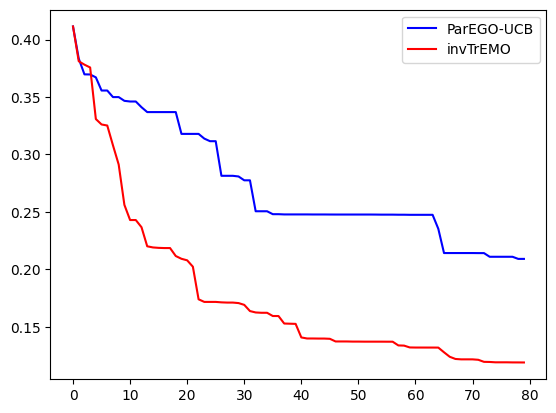

In [25]:
import matplotlib.pyplot as plt

plt.plot(np.array(Recorded_ParEGO_IGD), color = 'blue', label = 'ParEGO-UCB')
plt.plot(np.array(recorded_IGD), color = 'red', label = 'invTrEMO')
plt.legend()
# plt.semilogy()
plt.show()